In [13]:
# import libraries
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import newsrc.population as p
import newsrc.model as m
import newsrc.tuning as t


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tuning: communication network

## 1. Grid search

In [30]:
tuning =  t.Tuning()

/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args, 'yes')
<ipython-input-30-7e5a03539d76>:1: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  tuning =  t.Tuning()
/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:21: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args, 'yes')


In [31]:
# specify parameter space for grid search
seq = np.arange(0,1,0.05)
result_error, result_child, result_cl, empirical_data = tuning.execute_grid_search(t_range=seq,
                                                                                   i_range=seq,
                                                                                   t=700,
                                                                                   population_name='communication')

thres_PA: 0.0  I_PA: 0.0  error: 0.5203349046298661 |runtime: 6.132596015930176
thres_PA: 0.0  I_PA: 0.05  error: 15.474279695231449 |runtime: 6.029814958572388
thres_PA: 0.0  I_PA: 0.1  error: 38.843923645799876 |runtime: 6.021250009536743
thres_PA: 0.0  I_PA: 0.15000000000000002  error: 41.1664669350449 |runtime: 6.010607004165649
thres_PA: 0.0  I_PA: 0.2  error: 41.19544359758668 |runtime: 6.037007093429565
thres_PA: 0.0  I_PA: 0.25  error: 41.221726090803564 |runtime: 6.0682220458984375
thres_PA: 0.0  I_PA: 0.30000000000000004  error: 41.173714787006716 |runtime: 6.000320911407471
thres_PA: 0.0  I_PA: 0.35000000000000003  error: 41.16493923692582 |runtime: 6.01884388923645
thres_PA: 0.0  I_PA: 0.4  error: 41.17840364878443 |runtime: 10.548929691314697
thres_PA: 0.0  I_PA: 0.45  error: 41.156316716906545 |runtime: 6.048430919647217
thres_PA: 0.0  I_PA: 0.5  error: 41.204588259818884 |runtime: 5.977643966674805
thres_PA: 0.0  I_PA: 0.55  error: 41.136205582741646 |runtime: 6.02851986

### 1.2 Results

In [32]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0,,,,,,,,,,,,,,,,,,,,
0.00,0.520335,15.474280,38.843924,41.166467,41.195444,41.221726,41.173715,41.164939,41.178404,4.115632e+01,4.120459e+01,4.113621e+01,4.141342e+01,41.356661,4.138115e+01,41.757443,41.790007,41.784202,41.779977,41.831022
0.05,0.520335,324.163059,95.919314,24.966349,7.050474,4.736028,3.043139,3.794704,5.602129,6.889787e+00,8.870467e+00,1.182219e+01,3.765227e+03,16.592281,1.970273e+01,20.053573,22.378713,24.799274,26.287078,31.309096
0.10,0.520335,281.692395,421.355622,239.498216,140.235846,74.915242,36.802734,19.155562,13.505936,6.554612e+00,5.478328e+00,3.667493e+00,2.236797e+03,4.477043,6.433812e+00,8.703136,11.376728,12.735312,18.967777,27.231719
0.15,0.520335,2.000568,559.034974,447.632768,405.371155,212.149671,141.531187,83.065928,59.900928,3.938804e+01,6.520385e+14,1.649918e+11,4.190527e+03,5.663901,1.828610e+00,3.686247,6.699380,7.107660,9.423195,20.564136
0.20,0.520335,2.110595,374.620702,685.490390,682.703215,449.980992,324.460004,192.131799,150.359614,9.856239e+01,7.310462e+01,5.175293e+15,7.655307e+04,17.090160,9.476148e+00,7.088210,7.303867,5.388338,7.092357,14.482254
0.25,0.520335,2.102286,2.910161,403.743826,860.726256,577.483412,600.246078,361.288047,261.055020,1.608402e+03,1.582002e+02,1.133715e+02,2.401513e+04,56.260417,2.350600e+01,20.518976,13.305145,8.854527,7.555898,15.578936
0.30,0.520335,2.071355,2.452015,440.024105,730.499554,762.049577,549.655295,472.695953,349.209356,2.936145e+02,2.159228e+02,4.119217e+13,2.014298e+05,86.862629,4.290734e+01,43.664670,26.425064,10.672965,8.325140,11.316773
0.35,0.520335,2.051955,2.553006,569.600033,579.964789,1000.151696,901.020154,699.321920,565.007552,5.365951e+02,3.525435e+02,3.014005e+02,1.349579e+04,122.962072,7.874747e+01,67.632522,46.279789,31.207549,35.853219,12.074435
0.40,0.520335,1.930425,2.398101,783.176048,450.340749,1088.569128,737.509428,597.989230,593.894935,5.074677e+02,3.985533e+02,4.221943e+02,1.222490e+05,199.191014,1.263638e+02,93.882176,67.637022,49.415017,47.664678,10.352780


Text(0.5, 105.0, 'I PA')

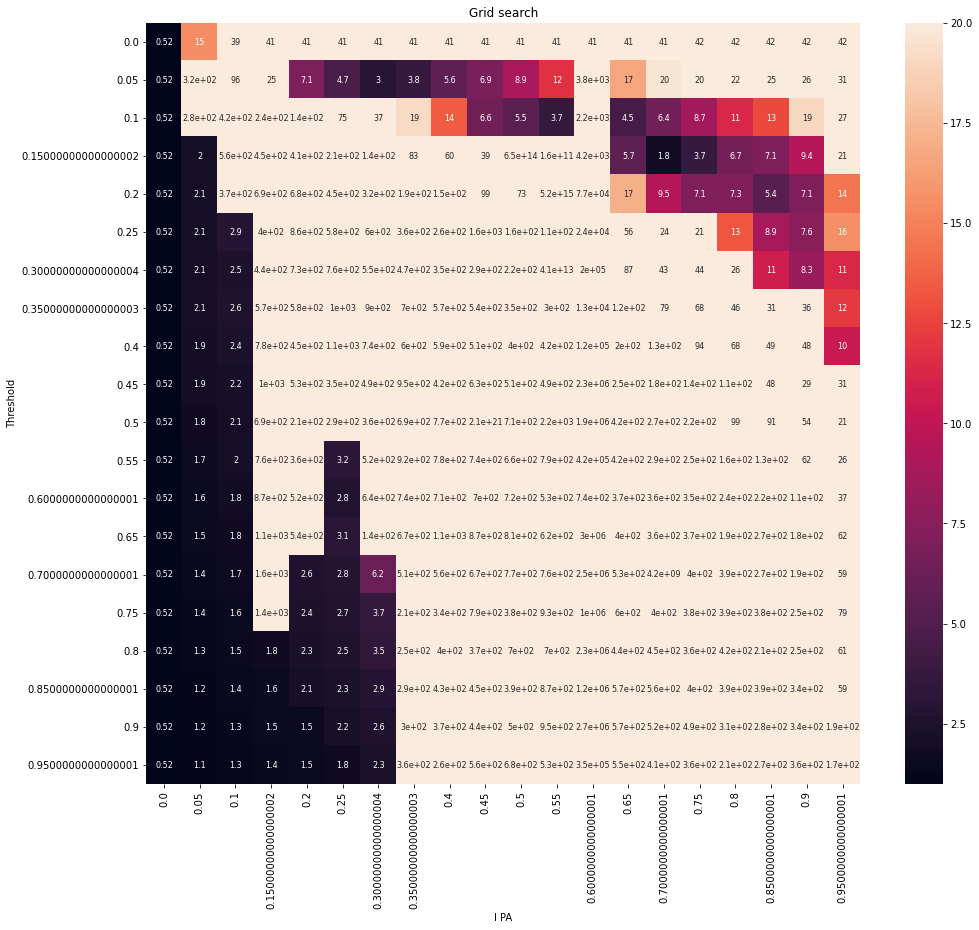

In [33]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=1, vmax=20)
plt.ylabel('Threshold')
plt.xlabel('I PA')

### 1.3 Optimal fit

<AxesSubplot:>

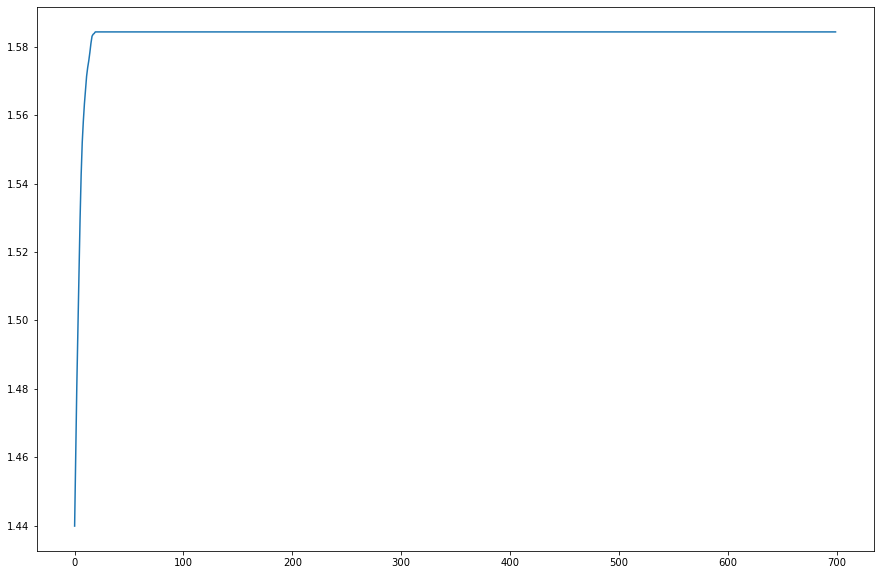

In [34]:
a = pd.DataFrame(result_cl[382]).mean(axis=1)

a.plot(figsize=((15,10)))








## 1. Grid search #2

### 1.1. Running

In [35]:
# specify parameter space for grid search
t_seq = np.arange(0,1,0.05)
# i_seq < 0.1
random.seed(4321)
i_seq = []
for i in range(10):
    i_seq.append(random.uniform(0,0.05))

i_seq.sort()

In [36]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute_grid_search(t_range=t_seq,
                                                                                   i_range=i_seq,
                                                                                   t=700,
                                                                                   population_name='communication')

thres_PA: 0.0  I_PA: 0.002119993736680881  error: 2.388471507556103 |runtime: 6.266014814376831
thres_PA: 0.0  I_PA: 0.0026513120109206536  error: 2.2569471215565042 |runtime: 5.9176881313323975
thres_PA: 0.0  I_PA: 0.0031768649610261937  error: 2.150572891851315 |runtime: 5.758140802383423
thres_PA: 0.0  I_PA: 0.008847961441091502  error: 2.004746521056332 |runtime: 5.994858026504517
thres_PA: 0.0  I_PA: 0.009295070389855182  error: 1.7767950073377712 |runtime: 6.435967206954956
thres_PA: 0.0  I_PA: 0.012714048123289929  error: 1.8865223087744665 |runtime: 6.520693063735962
thres_PA: 0.0  I_PA: 0.014539855499095374  error: 1.982360367946866 |runtime: 6.043748140335083
thres_PA: 0.0  I_PA: 0.018271371019437672  error: 2.3056042743720857 |runtime: 5.701467037200928
thres_PA: 0.0  I_PA: 0.020375889464703714  error: 2.5703669605990975 |runtime: 5.765439033508301
thres_PA: 0.0  I_PA: 0.04525909672468739  error: 12.251033515093896 |runtime: 5.7470362186431885
thres_PA: 0.05  I_PA: 0.0021199

### 1.2 Results

In [37]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.002120,0.002651,0.003177,0.008848,0.009295,0.012714,0.014540,0.018271,0.020376,0.045259
0,,,,,,,,,,
0.00,2.388472,2.256947,2.150573,2.004747,1.776795,1.886522,1.982360,2.305604,2.570367,12.251034
0.05,0.981807,0.982332,0.993193,1.062306,1.062276,1.115071,1.282417,257.910439,1.367511,425.484355
0.10,1.258133,1.263140,1.262254,1.300433,1.293000,1.343290,1.322088,1.381543,1.408976,1.861767
0.15,1.566799,1.581784,1.584708,1.623245,1.618449,1.616201,1.651047,1.680795,1.697465,1.983147
0.20,1.703223,1.723769,1.725737,1.752059,1.764164,1.784306,1.800156,1.810389,1.827444,1.993708
0.25,1.756373,1.782060,1.785398,1.822107,1.823307,1.849693,1.851366,1.884308,1.893269,2.049693
0.30,1.751057,1.773219,1.775027,1.799038,1.810841,1.831119,1.835568,1.863475,1.878038,2.087238
0.35,1.723583,1.744990,1.748452,1.771243,1.786765,1.794238,1.817888,1.837151,1.856284,2.007917
0.40,1.672156,1.696390,1.698636,1.728744,1.727315,1.747089,1.754947,1.763552,1.770903,1.921149


Text(0.5, 105.0, 'I PA')

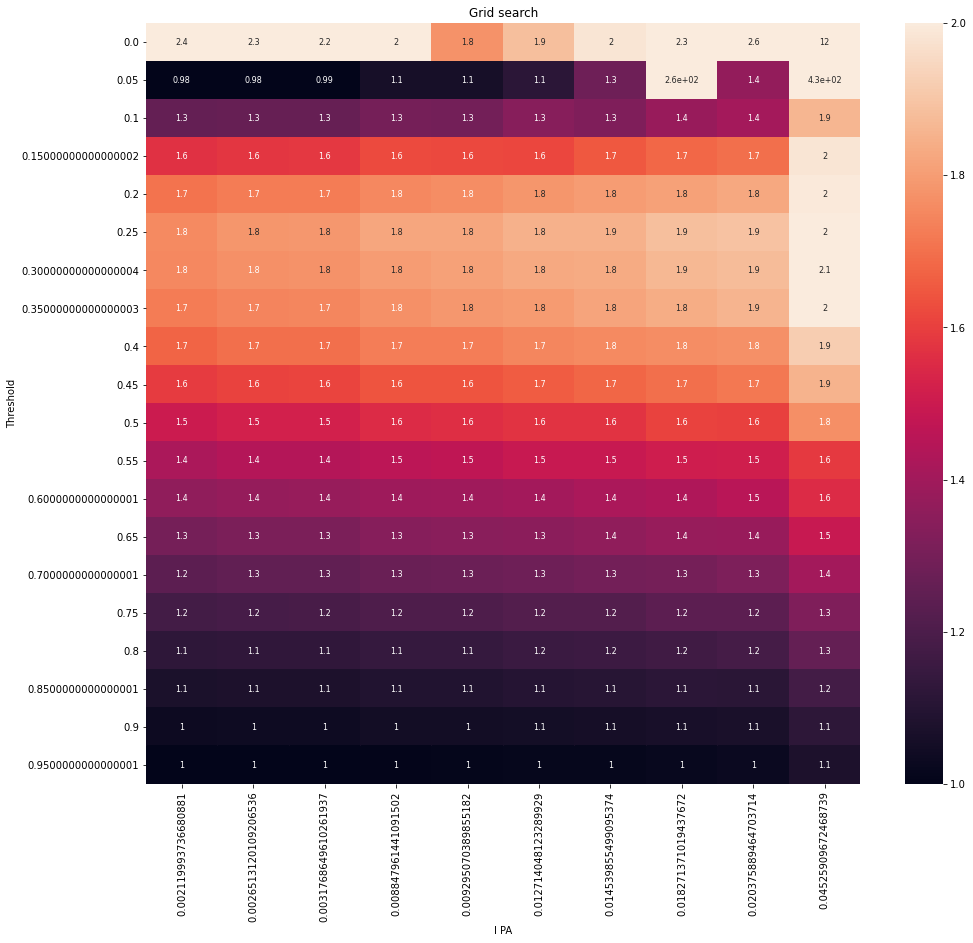

In [38]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 8}, vmin=1, vmax=2)
plt.ylabel('Threshold')
plt.xlabel('I PA')

0      1.439829
1      1.440391
2      1.440943
3      1.441497
4      1.442052
         ...   
695    1.551613
696    1.551613
697    1.551613
698    1.551613
699    1.551613
Length: 700, dtype: float64

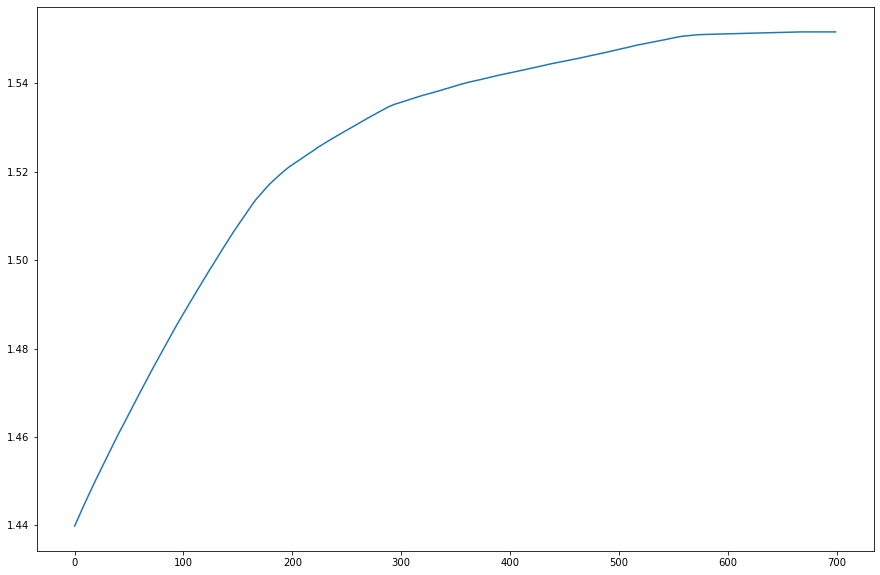

In [40]:
a = pd.DataFrame(result_cl2[11]).mean(axis=1)

a.plot(figsize=((15,10)))
a

## 2. Simulated Annealing

In [41]:
parameters, error_hist, parameters_hist = tuning.execute_simulated_annealing(initial_parameters=[0.05,0.002],
                                                                             t=700,
                                                                             population_name="communication")

thres_PA:  0.05  I_PA:  0.002 |runtime:  5.798114061355591

Temp:  1.0
1.0 1 thres_PA:  0.07056626115980776  I_PA:  0.0010116338176223046 cost:  0.8680869210052251 |runtime:  5.832875967025757
1.0 2 thres_PA:  0.15912067750161224  I_PA:  0.00035307159294184487 cost:  0.6478684292222155 |runtime:  5.852823257446289
1.0 3 thres_PA:  0.24237602387561066  I_PA:  1e-05 cost:  0.5208783435948772 |runtime:  5.832247018814087
1.0 4 thres_PA:  0.16516067052351976  I_PA:  1e-05 cost:  0.5206502800305275 |runtime:  5.814943075180054
1.0 5 thres_PA:  0.11201192813013616  I_PA:  0.003560957638620172 cost:  1.3456158357127792 |runtime:  5.731637954711914
1.0 6 thres_PA:  0.1297481211102205  I_PA:  0.006735966398328696 cost:  1.4932998186045783 |runtime:  5.674558877944946
1.0 7 thres_PA:  0.11667283591740525  I_PA:  0.003932196306789315 cost:  1.3825594052184191 |runtime:  5.723643064498901
1.0 8 thres_PA:  0.13638387807670777  I_PA:  0.0008763374187802596 cost:  1.1255573971368726 |runtime:  5.7150

### 2.2 Resutls

In [43]:
min(error_hist)

0.48675932865950045

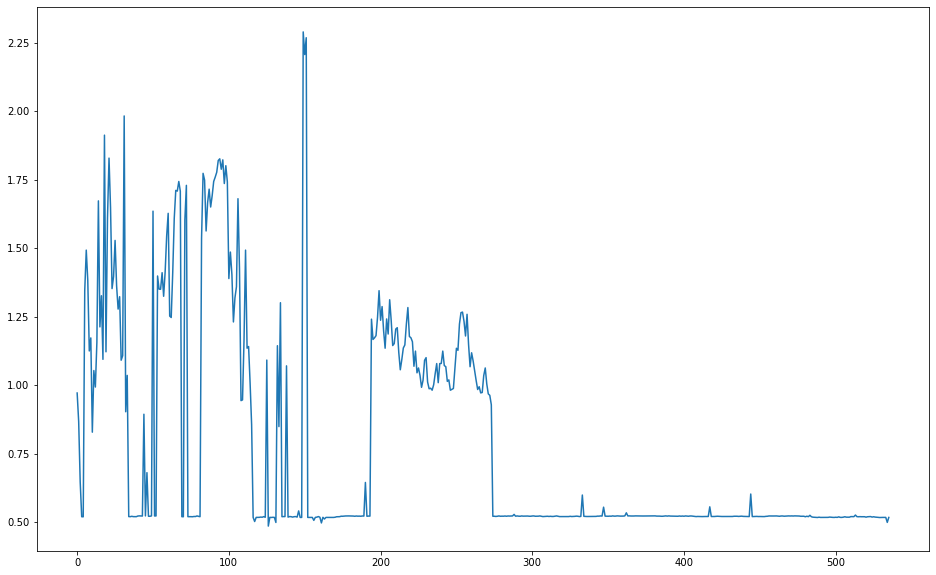

In [44]:
plt.figure(figsize=((16,10)))
plt.plot(error_hist)

In [45]:
thres_h_all = np.asarray([p_all[0] for p_all in parameters_hist])
ipa_h_all = np.asarray([p_all[1] for p_all in parameters_hist])
cost_h_all = np.asarray(error_hist)

Text(0, 0.5, 'I PA')

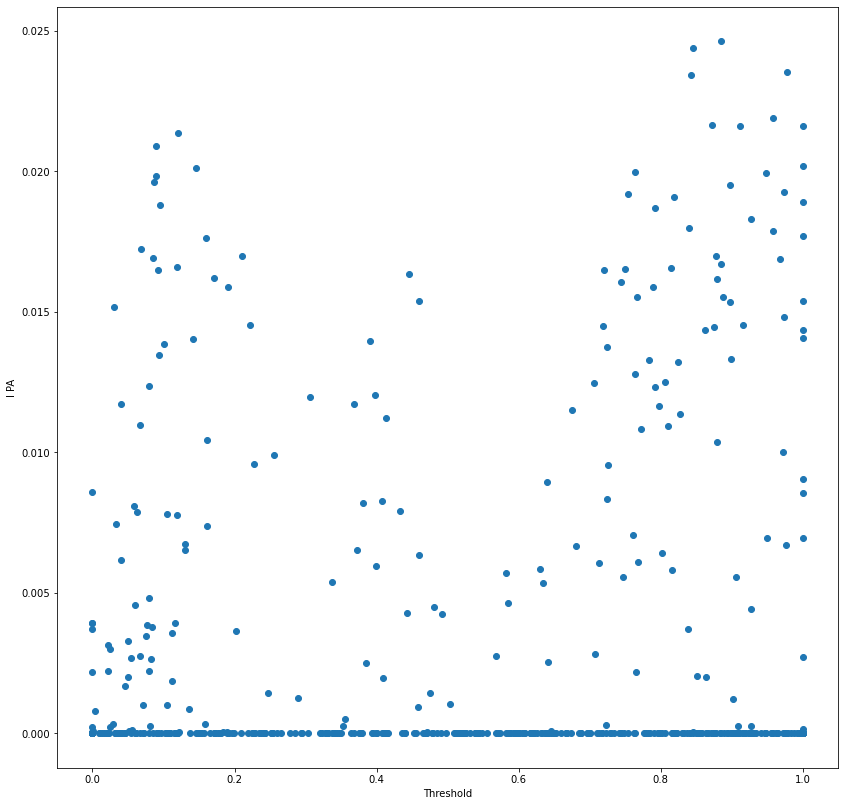

In [46]:
plt.figure(figsize=((14,14)))
plt.scatter(thres_h_all, ipa_h_all)
plt.xlabel('Threshold')
plt.ylabel('I PA')


